# Machine Learning Model To Predict whether person is vaccinated or not

dataset "H1N1 and Seasonal Flu Vaccines" was downloaded from: https://www.kaggle.com/datasets/arashnic/flu-data/data

# Step 1 importing libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC



# Getting data from csv

In [137]:
df = pd.read_csv('H1N1_Flu_Vaccines.csv')
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [138]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [139]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [140]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

# Preprocessing and clearing data

As you can see above there are several <font color='red'>categorial values</font>. To work with this features
we must change them into <font color='green'>numberical data types</font>

In [141]:
#Age_group is an object, we need to convert it to a numerical value
categorial_features = ['age_group', 'education', 'race', 'sex', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']

ordEnc = OrdinalEncoder()

df[categorial_features] = ordEnc.fit_transform(df[categorial_features])



In [142]:
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,8.0,2.0,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,5.0,1.0,0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,9.0,0.0,1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,9.0,2.0,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,6.0,1.0,1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,NaN,6.0,0.0,0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,0.0,5.0,2.0,1.0,0.0,fcxhlnwr,haliazsg,0,0


The logic of dealing with null values:
    
    if the amount of null exceed 10% of total data - this column will be droped out of dataset
    10% threshold is chosen based on quantity on columns with too many loses

    else, if it is less, then put mean values where was null.

Therefore, the dropped columns are:
    health_insurance, income_poverty, employment_industry, employment_occupation

Columns, where nulls will be replaced with mean:
    h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_h1n1, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children

In [143]:
drop_features = ['health_insurance', 'income_poverty', 'employment_industry', 'employment_occupation']
df.drop(drop_features, axis=1, inplace=True)

In [144]:
SimpleImputer = SimpleImputer(missing_values= np.NaN ,strategy='mean')
replace_with_mean_features = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
                              'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 
                              'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 
                              'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 
                              'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 
                              'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'marital_status', 'rent_or_own', 
                              'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children']
df[replace_with_mean_features] = SimpleImputer.fit_transform(df[replace_with_mean_features])

In [145]:
df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [146]:
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,0.0,1.0,0.0,1.000000,8.0,2.0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,1.0,1.0,1.0,0.000000,1.0,0.0,0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,1.0,0.0,0.000000,9.0,0.0,2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,0.0,1.0,1.0,1.000000,5.0,1.0,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,0.0,0.0,0.0,0.000000,9.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,1.0,0.0,1.000000,9.0,2.0,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,1.0,1.0,1.0,0.000000,6.0,1.0,1.0,0.0,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,0.0,1.0,0.0,0.520401,6.0,0.0,0.0,0.0,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,0.0,0.0,1.0,0.000000,5.0,2.0,1.0,0.0,0,0


# Identifing important features and correlations

Here we fill define what features are the most important and the least, let's see graphs 

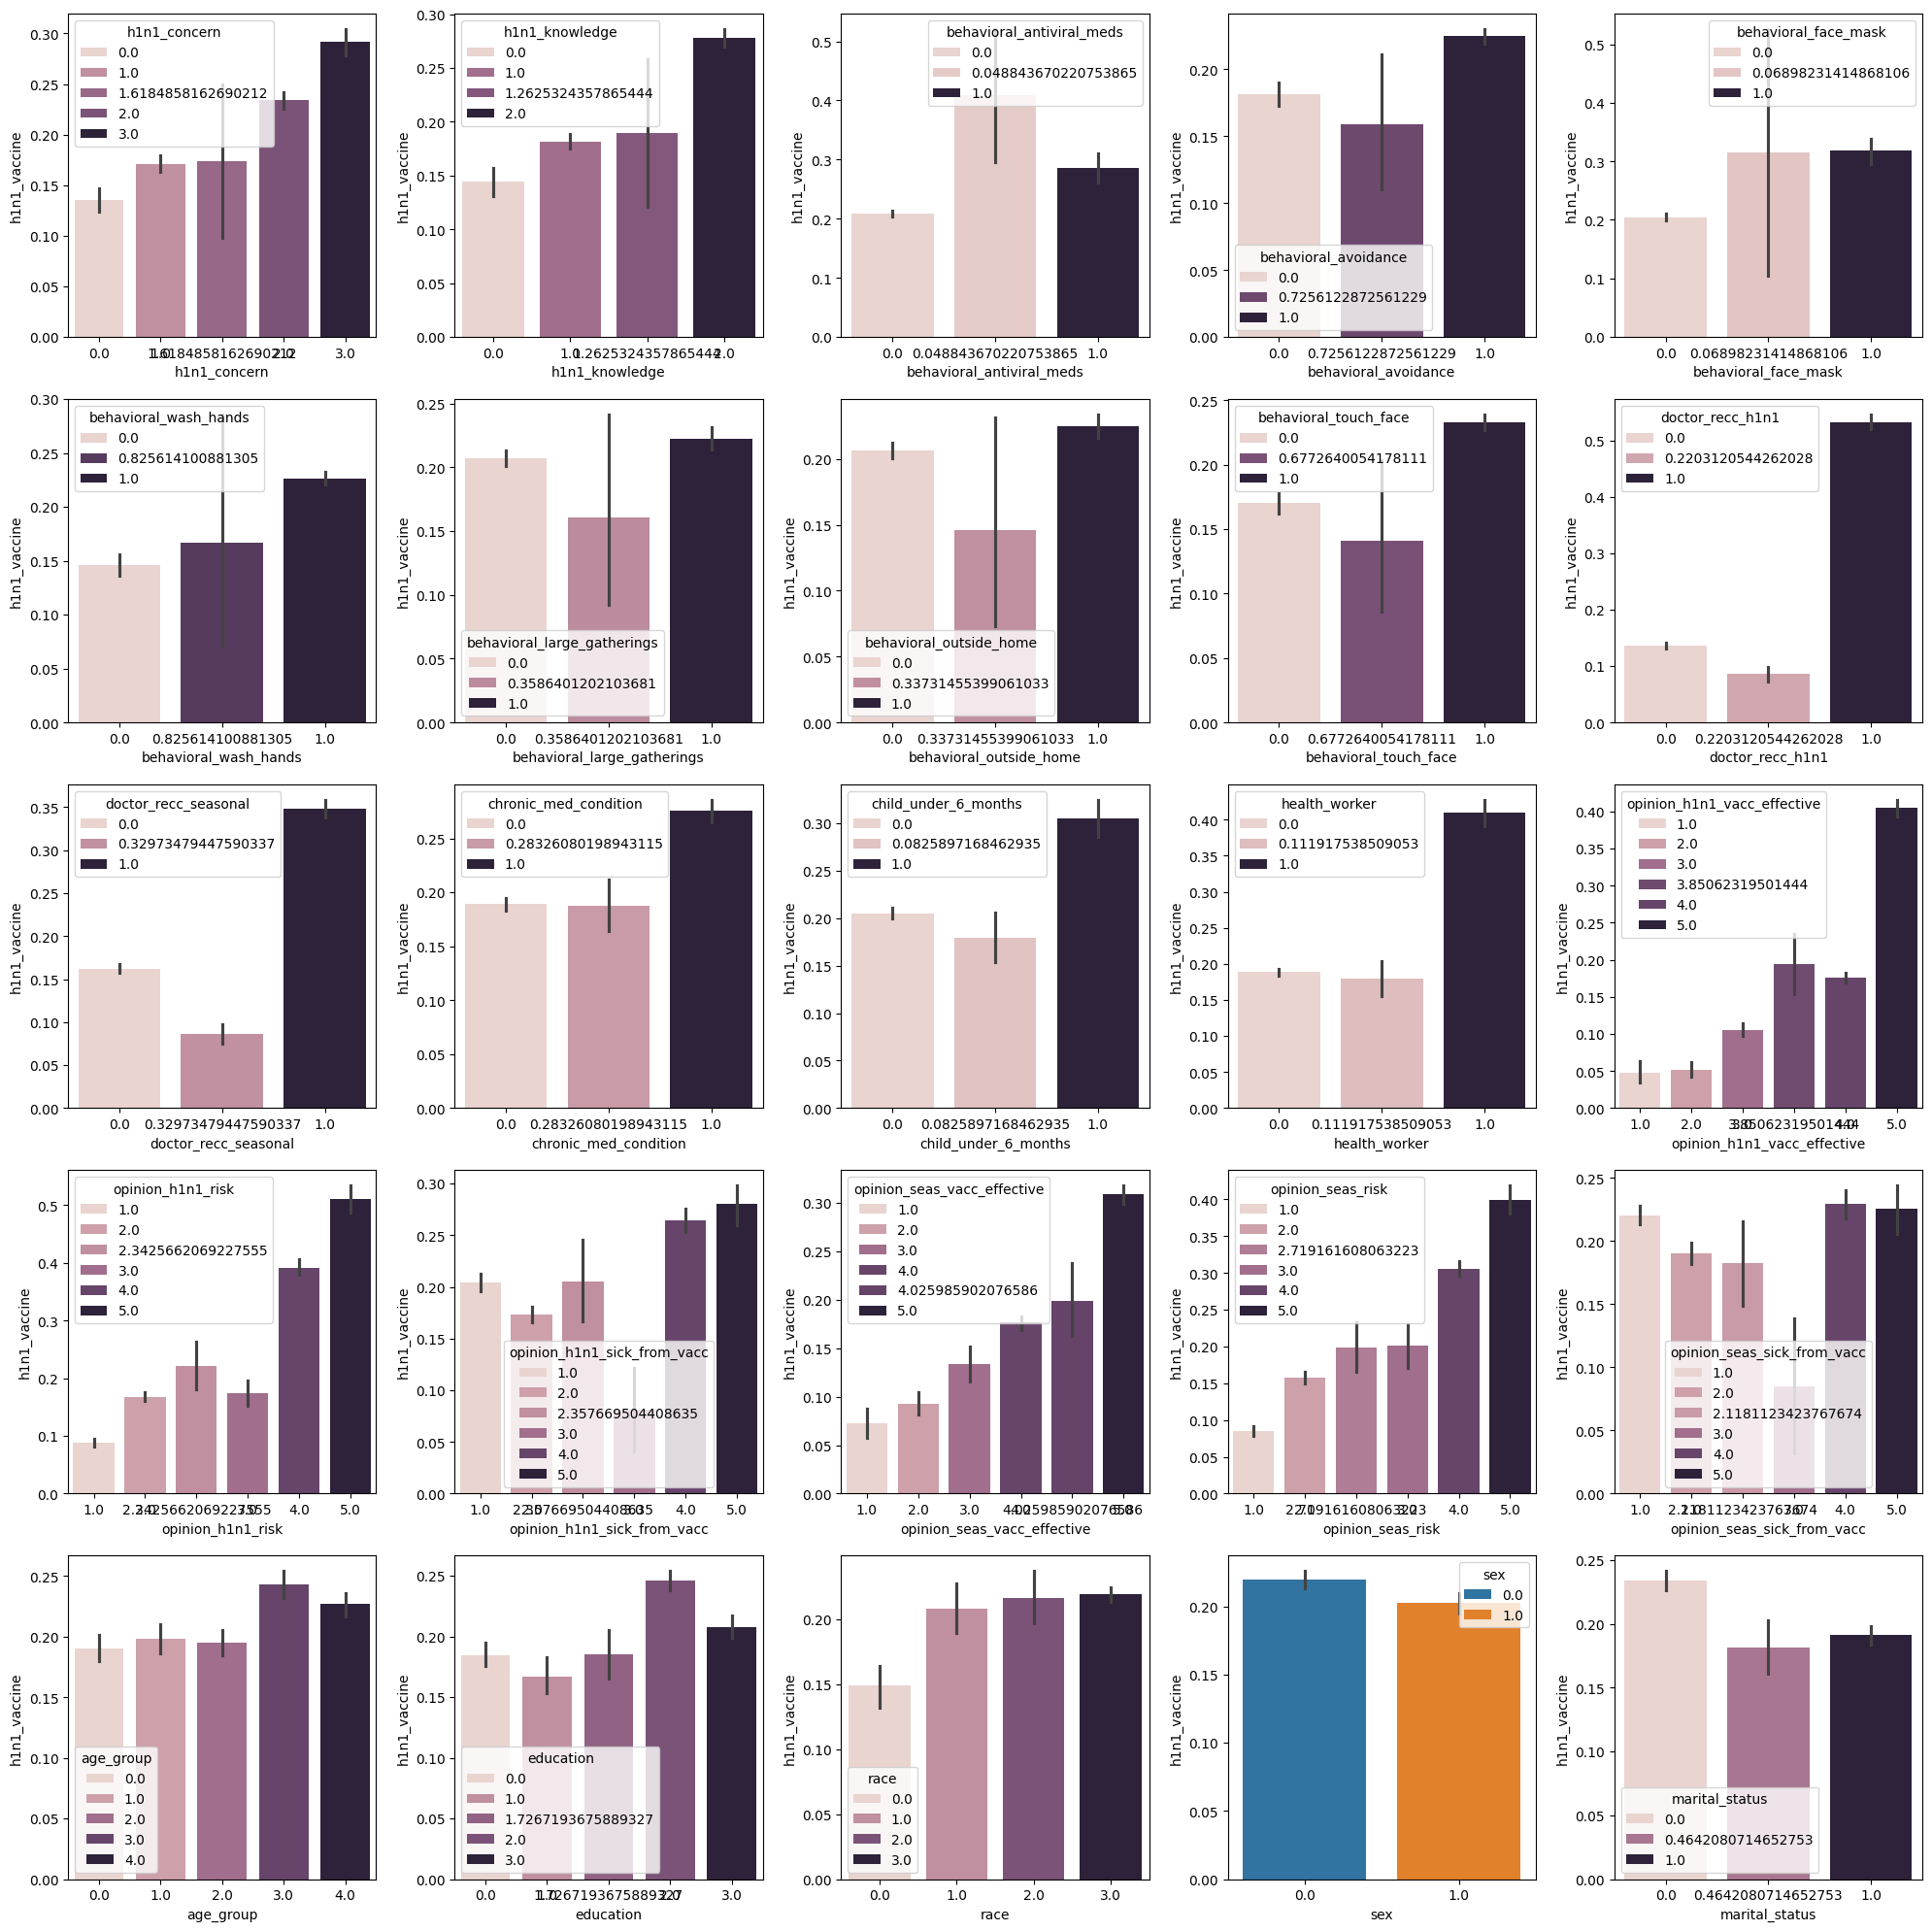

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, saxis = plt.subplots(5, 5, figsize=(20, 20))  # Adjust the size as needed

sns.barplot(data=df, x="h1n1_concern", y="h1n1_vaccine", ax=saxis[0][0], hue="h1n1_concern")
sns.barplot(data=df, x="h1n1_knowledge", y="h1n1_vaccine", ax=saxis[0][1], hue="h1n1_knowledge")
sns.barplot(data=df, x="behavioral_antiviral_meds", y="h1n1_vaccine", ax=saxis[0][2], hue="behavioral_antiviral_meds")
sns.barplot(data=df, x="behavioral_avoidance", y="h1n1_vaccine", ax=saxis[0][3], hue="behavioral_avoidance")
sns.barplot(data=df, x="behavioral_face_mask", y="h1n1_vaccine", ax=saxis[0][4], hue="behavioral_face_mask")

sns.barplot(data=df, x="behavioral_wash_hands", y="h1n1_vaccine", ax=saxis[1][0], hue="behavioral_wash_hands")
sns.barplot(data=df, x="behavioral_large_gatherings", y="h1n1_vaccine", ax=saxis[1][1], hue="behavioral_large_gatherings")
sns.barplot(data=df, x="behavioral_outside_home", y="h1n1_vaccine", ax=saxis[1][2], hue="behavioral_outside_home")
sns.barplot(data=df, x="behavioral_touch_face", y="h1n1_vaccine", ax=saxis[1][3], hue="behavioral_touch_face")
sns.barplot(data=df, x="doctor_recc_h1n1", y="h1n1_vaccine", ax=saxis[1][4], hue="doctor_recc_h1n1")

sns.barplot(data=df, x="doctor_recc_seasonal", y="h1n1_vaccine", ax=saxis[2][0], hue="doctor_recc_seasonal")
sns.barplot(data=df, x="chronic_med_condition", y="h1n1_vaccine", ax=saxis[2][1], hue="chronic_med_condition")
sns.barplot(data=df, x="child_under_6_months", y="h1n1_vaccine", ax=saxis[2][2], hue="child_under_6_months")
sns.barplot(data=df, x="health_worker", y="h1n1_vaccine", ax=saxis[2][3], hue="health_worker")
sns.barplot(data=df, x="opinion_h1n1_vacc_effective", y="h1n1_vaccine", ax=saxis[2][4], hue="opinion_h1n1_vacc_effective")

sns.barplot(data=df, x="opinion_h1n1_risk", y="h1n1_vaccine", ax=saxis[3][0], hue="opinion_h1n1_risk")
sns.barplot(data=df, x="opinion_h1n1_sick_from_vacc", y="h1n1_vaccine", ax=saxis[3][1], hue="opinion_h1n1_sick_from_vacc")
sns.barplot(data=df, x="opinion_seas_vacc_effective", y="h1n1_vaccine", ax=saxis[3][2], hue="opinion_seas_vacc_effective")
sns.barplot(data=df, x="opinion_seas_risk", y="h1n1_vaccine", ax=saxis[3][3], hue="opinion_seas_risk")
sns.barplot(data=df, x="opinion_seas_sick_from_vacc", y="h1n1_vaccine", ax=saxis[3][4], hue="opinion_seas_sick_from_vacc")

sns.barplot(data=df, x="age_group", y="h1n1_vaccine", ax=saxis[4][0], hue="age_group")
sns.barplot(data=df, x="education", y="h1n1_vaccine", ax=saxis[4][1], hue="education")
sns.barplot(data=df, x="race", y="h1n1_vaccine", ax=saxis[4][2], hue="race")
sns.barplot(data=df, x="sex", y="h1n1_vaccine", ax=saxis[4][3], hue="sex")
sns.barplot(data=df, x="marital_status", y="h1n1_vaccine", ax=saxis[4][4], hue="marital_status")

plt.tight_layout()
plt.show()


Using this plots we can clear identify which features affect on chance that person took h1n1 vaccine

Plots for the seasonal vaccine

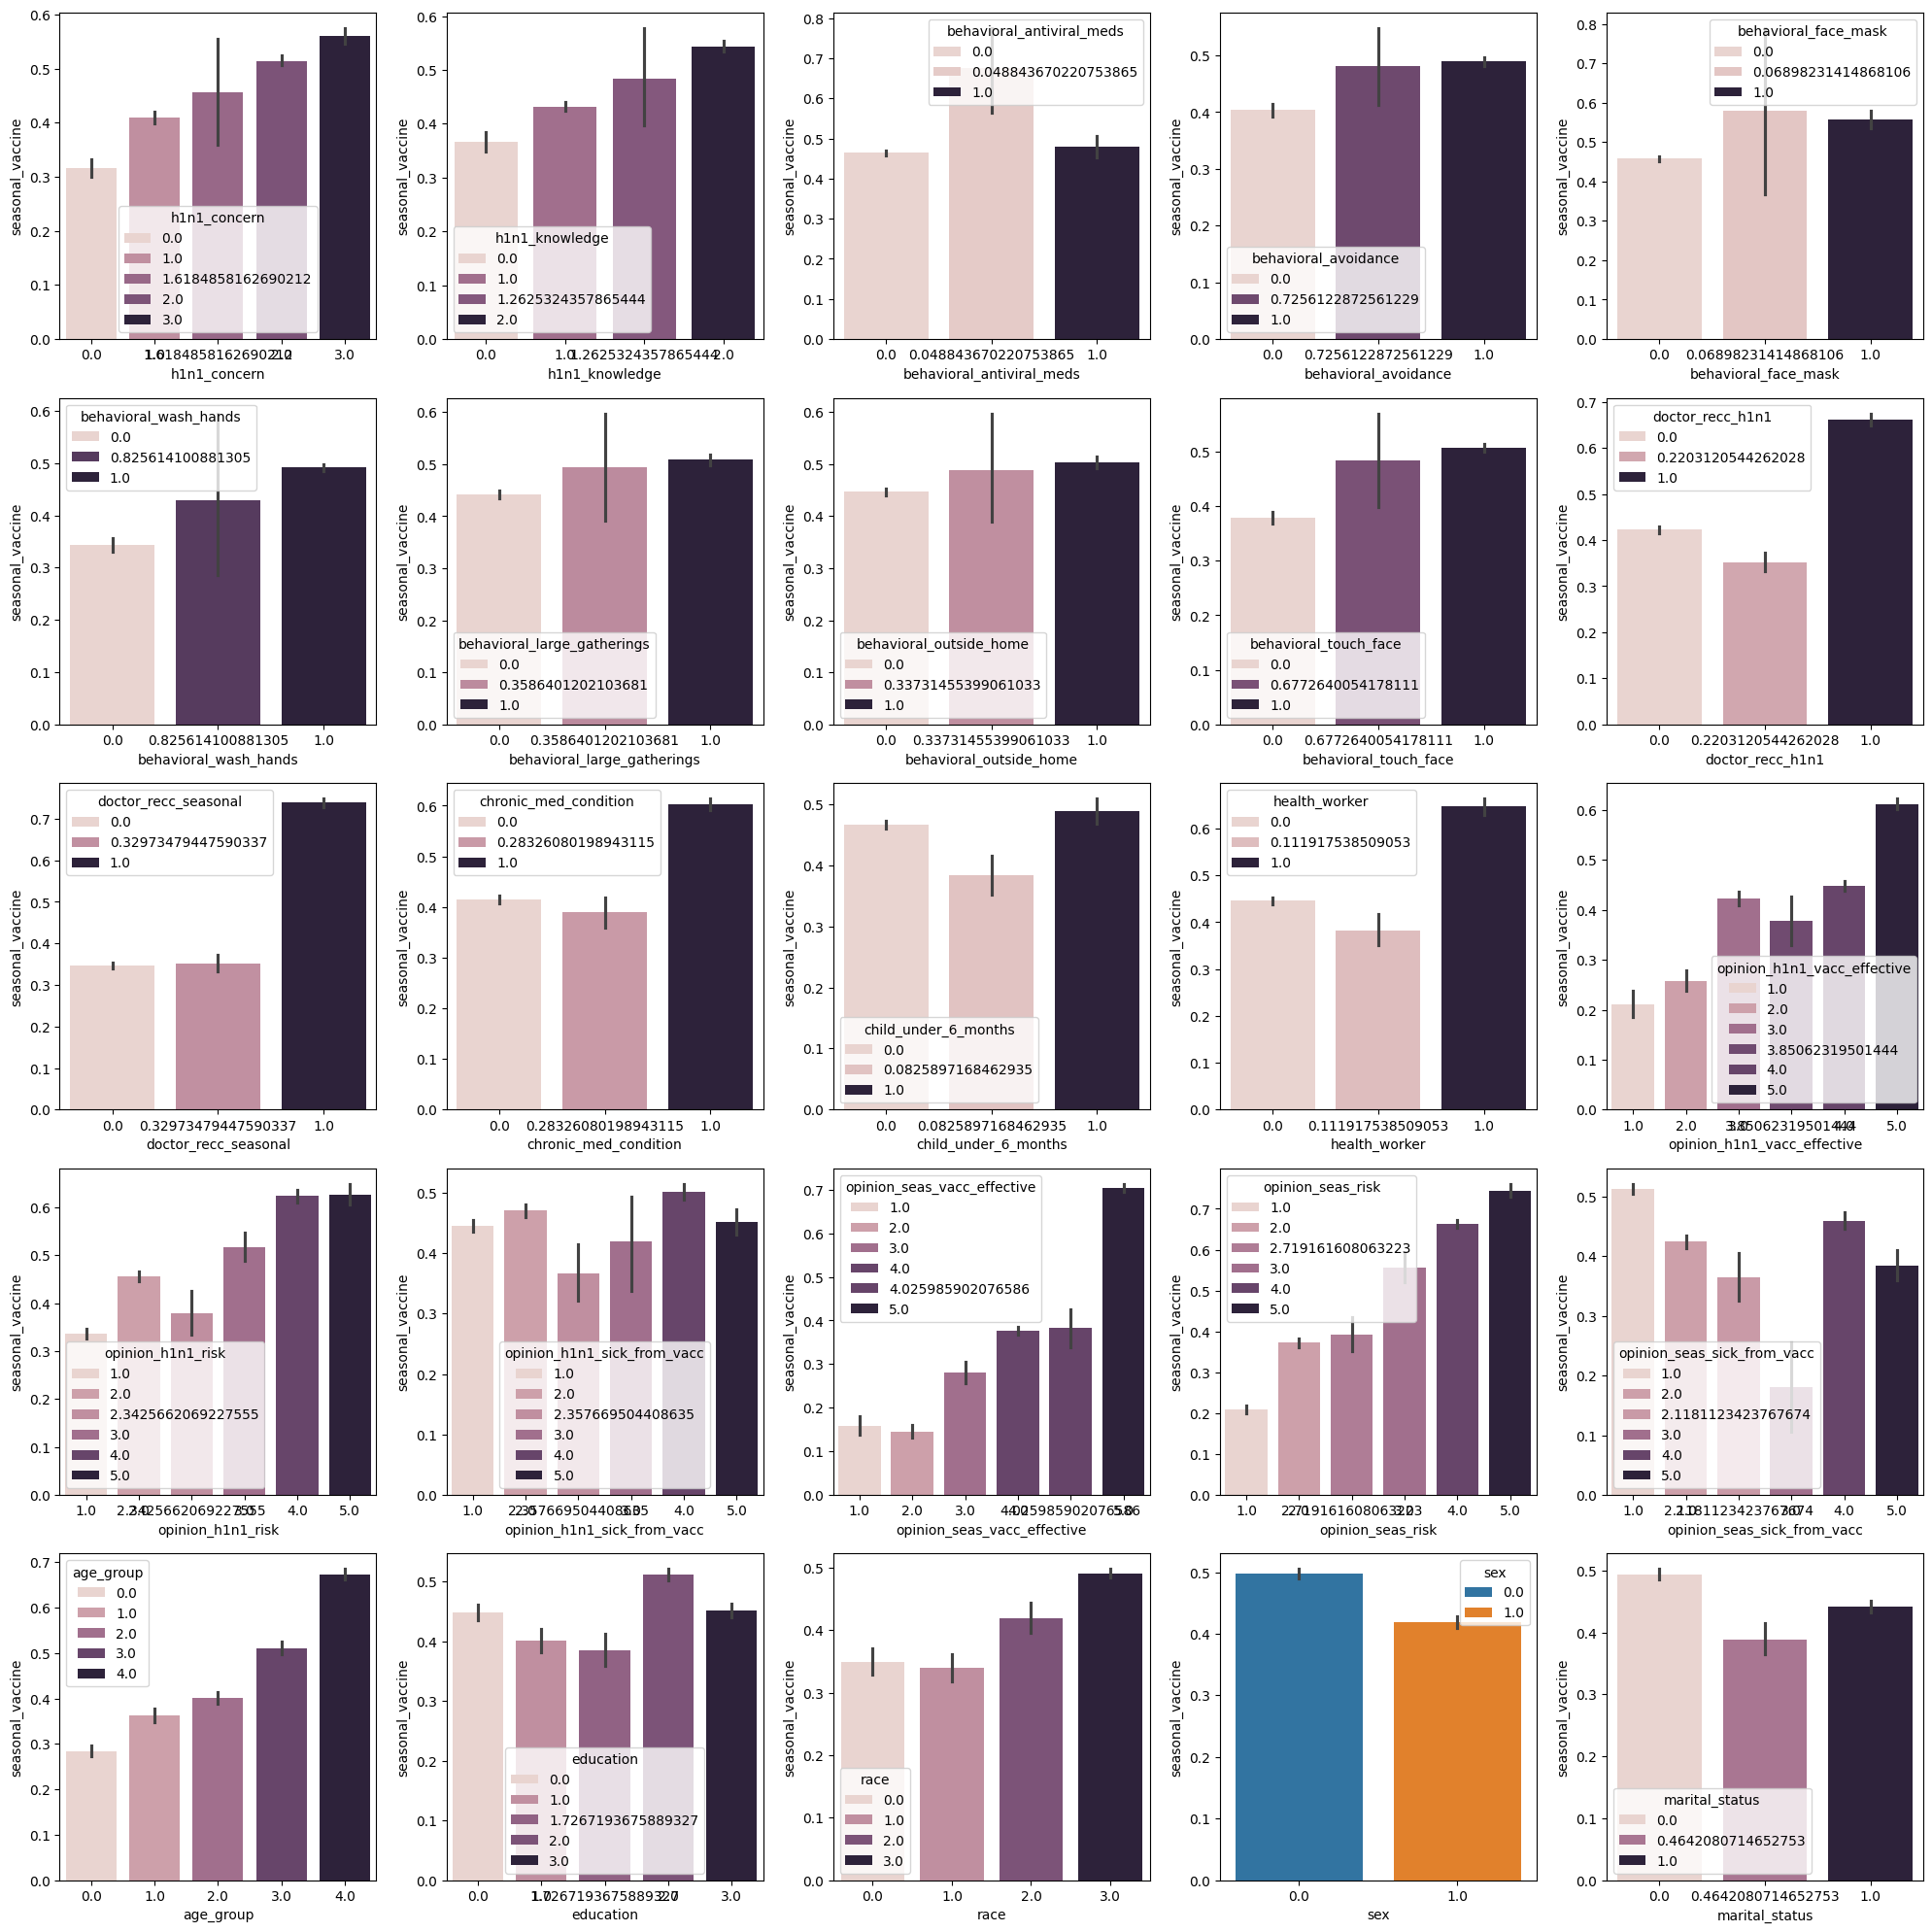

In [148]:
fig, saxis = plt.subplots(5, 5, figsize=(20, 20))  # Adjust the size as needed

sns.barplot(data=df, x="h1n1_concern", y="seasonal_vaccine", ax=saxis[0][0], hue="h1n1_concern")
sns.barplot(data=df, x="h1n1_knowledge", y="seasonal_vaccine", ax=saxis[0][1], hue="h1n1_knowledge")
sns.barplot(data=df, x="behavioral_antiviral_meds", y="seasonal_vaccine", ax=saxis[0][2], hue="behavioral_antiviral_meds")
sns.barplot(data=df, x="behavioral_avoidance", y="seasonal_vaccine", ax=saxis[0][3], hue="behavioral_avoidance")
sns.barplot(data=df, x="behavioral_face_mask", y="seasonal_vaccine", ax=saxis[0][4], hue="behavioral_face_mask")

sns.barplot(data=df, x="behavioral_wash_hands", y="seasonal_vaccine", ax=saxis[1][0], hue="behavioral_wash_hands")
sns.barplot(data=df, x="behavioral_large_gatherings", y="seasonal_vaccine", ax=saxis[1][1], hue="behavioral_large_gatherings")
sns.barplot(data=df, x="behavioral_outside_home", y="seasonal_vaccine", ax=saxis[1][2], hue="behavioral_outside_home")
sns.barplot(data=df, x="behavioral_touch_face", y="seasonal_vaccine", ax=saxis[1][3], hue="behavioral_touch_face")
sns.barplot(data=df, x="doctor_recc_h1n1", y="seasonal_vaccine", ax=saxis[1][4], hue="doctor_recc_h1n1")

sns.barplot(data=df, x="doctor_recc_seasonal", y="seasonal_vaccine", ax=saxis[2][0], hue="doctor_recc_seasonal")
sns.barplot(data=df, x="chronic_med_condition", y="seasonal_vaccine", ax=saxis[2][1], hue="chronic_med_condition")
sns.barplot(data=df, x="child_under_6_months", y="seasonal_vaccine", ax=saxis[2][2], hue="child_under_6_months")
sns.barplot(data=df, x="health_worker", y="seasonal_vaccine", ax=saxis[2][3], hue="health_worker")
sns.barplot(data=df, x="opinion_h1n1_vacc_effective", y="seasonal_vaccine", ax=saxis[2][4], hue="opinion_h1n1_vacc_effective")

sns.barplot(data=df, x="opinion_h1n1_risk", y="seasonal_vaccine", ax=saxis[3][0], hue="opinion_h1n1_risk")
sns.barplot(data=df, x="opinion_h1n1_sick_from_vacc", y="seasonal_vaccine", ax=saxis[3][1], hue="opinion_h1n1_sick_from_vacc")
sns.barplot(data=df, x="opinion_seas_vacc_effective", y="seasonal_vaccine", ax=saxis[3][2], hue="opinion_seas_vacc_effective")
sns.barplot(data=df, x="opinion_seas_risk", y="seasonal_vaccine", ax=saxis[3][3], hue="opinion_seas_risk")
sns.barplot(data=df, x="opinion_seas_sick_from_vacc", y="seasonal_vaccine", ax=saxis[3][4], hue="opinion_seas_sick_from_vacc")

sns.barplot(data=df, x="age_group", y="seasonal_vaccine", ax=saxis[4][0], hue="age_group")
sns.barplot(data=df, x="education", y="seasonal_vaccine", ax=saxis[4][1], hue="education")
sns.barplot(data=df, x="race", y="seasonal_vaccine", ax=saxis[4][2], hue="race")
sns.barplot(data=df, x="sex", y="seasonal_vaccine", ax=saxis[4][3], hue="sex")
sns.barplot(data=df, x="marital_status", y="seasonal_vaccine", ax=saxis[4][4], hue="marital_status")

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()


# Creating train and validation subsets

In [149]:
features = [
    "h1n1_concern",
    "h1n1_knowledge",
    "behavioral_antiviral_meds",
    "behavioral_avoidance",
    "behavioral_face_mask",
    "behavioral_wash_hands",
    "behavioral_large_gatherings",
    "behavioral_outside_home",
    "behavioral_touch_face",
    "doctor_recc_h1n1",
    "doctor_recc_seasonal",
    "chronic_med_condition",
    "child_under_6_months",
    "health_worker",
    "opinion_h1n1_vacc_effective",
    "opinion_h1n1_risk",
    "opinion_h1n1_sick_from_vacc",
    "opinion_seas_vacc_effective",
    "opinion_seas_risk",
    "opinion_seas_sick_from_vacc",
    "age_group",
    "education",
    "race",
    "sex",
    "marital_status"
]

X = df[features]

X

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,marital_status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,...,1.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.000000,...,4.0,4.0,4.0,2.0,4.0,1.0,0.0,3.0,1.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.220312,...,1.0,1.0,4.0,1.0,2.0,0.0,2.0,3.0,1.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000,...,3.0,5.0,5.0,4.0,1.0,4.0,0.0,3.0,0.0,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,0.000000,...,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,...,1.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.000000,...,2.0,2.0,5.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.000000,...,4.0,2.0,5.0,4.0,2.0,3.0,3.0,3.0,0.0,1.0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,0.000000,...,1.0,2.0,2.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0


In [150]:
y1 = df['h1n1_vaccine']
y2 = df['seasonal_vaccine']

In [151]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X, y1, test_size=0.33)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, y2, test_size=0.33)
y_train_1

18336    0
12599    0
2261     1
20405    0
26040    1
        ..
17329    0
22995    0
22168    0
24257    0
4510     1
Name: h1n1_vaccine, Length: 17893, dtype: int64

# Training Different Models To Predict 
## <font color = "green"> "H1N1_VACCINE" </font> and
## <font color="green">"SEASONAL VACCIENS"</font>

In [152]:
from sklearn.metrics import accuracy_score

We will solve classification problem using several ML models, then we will compare the results to choose the best model.

#### K-nearest

In [153]:
knc = KNeighborsClassifier()

knc.fit(X_train_1, y_train_1)

y_pred = knc.predict(X_val_1)

knc_as = accuracy_score(y_val_1, y_pred)

knc.fit(X_train_2, y_train_2)

y_pred = knc.predict(X_val_2)

knc_as_2 = accuracy_score(y_val_2, y_pred)

#### Logistic Regression

In [154]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_1, y_train_1)

y_pred = lr.predict(X_val_1)

lr_as = accuracy_score(y_val_1, y_pred)

lr.fit(X_train_2, y_train_2)

y_pred = lr.predict(X_val_2)

lr_as_2 = accuracy_score(y_val_2, y_pred)

#### Naive Bayes

In [155]:
gnb = GaussianNB()
gnb.fit(X_train_1, y_train_1)

y_pred = gnb.predict(X_val_1)

gnb_as = accuracy_score(y_val_1, y_pred)

gnb.fit(X_train_2, y_train_2)

y_pred = gnb.predict(X_val_2)

gnb_as_2 = accuracy_score(y_val_2, y_pred)

#### Random Forest Classifier

In [156]:
rfc = RandomForestClassifier()

rfc.fit(X_train_1, y_train_1)

y_pred = rfc.predict(X_val_1)

rfc_as = accuracy_score(y_val_1, y_pred)

rfc.fit(X_train_2, y_train_2)

y_pred = rfc.predict(X_val_2)

rfc_as_2 = accuracy_score(y_val_2, y_pred)

#### Decision Tree

In [157]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_1, y_train_1)

y_pred = dtc.predict(X_val_1)

dtc_as = accuracy_score(y_val_1, y_pred)

dtc.fit(X_train_2, y_train_2)

y_pred = dtc.predict(X_val_2)

dtc_as_2 = accuracy_score(y_val_2, y_pred)

#### GradientBoosting

In [158]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train_1, y_train_1)

y_pred = gbc.predict(X_val_1)

gbc_as = accuracy_score(y_val_1, y_pred)  

gbc.fit(X_train_2, y_train_2)

y_pred = gbc.predict(X_val_2)

gbc_as_2 = accuracy_score(y_val_2, y_pred)

#### Support Vector Machine

In [159]:
svc = SVC()

svc.fit(X_train_1, y_train_1)

y_pred = svc.predict(X_val_1)

svc_as = accuracy_score(y_val_1, y_pred)

svc.fit(X_train_2, y_train_2)

y_pred = svc.predict(X_val_2)

svc_as_2 = accuracy_score(y_val_2, y_pred)

## Now let's compare models

### The rating of models to predict if person is vaccinated to H1N1

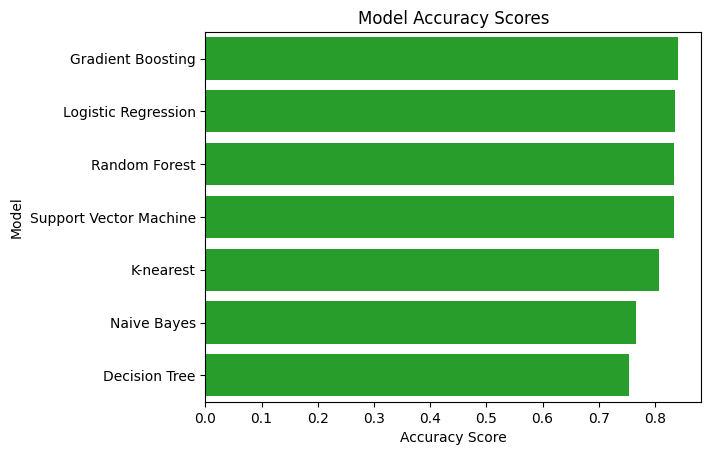

In [160]:
accuracy_scores_1 = [lr_as, gnb_as, rfc_as, dtc_as, gbc_as, knc_as, svc_as]

models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'K-nearest', 'Support Vector Machine']

combined_1 = sorted(zip(accuracy_scores_1, models), reverse=True)
sorted_accuracy_scores_1, sorted_models_1 = zip(*combined_1)


sns.barplot(x=sorted_accuracy_scores_1, y=sorted_models_1, color='xkcd:green')

plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Model Accuracy Scores')
plt.show()


### The rating of models to predict if person is vaccinated to season flu

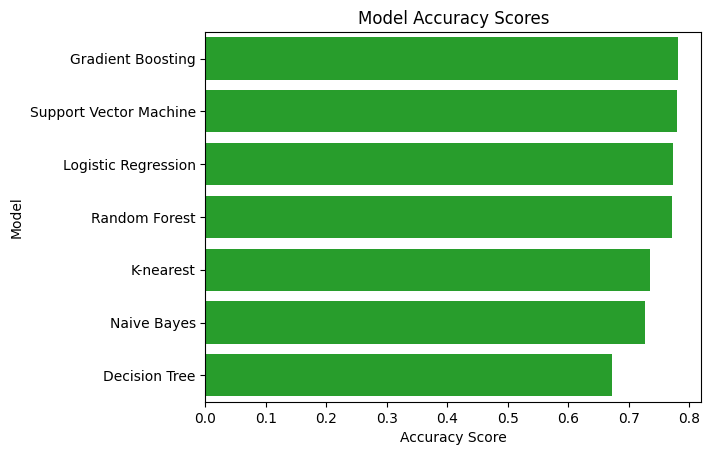

In [161]:
accuracy_scores_2 = [lr_as_2, gnb_as_2, rfc_as_2, dtc_as_2, gbc_as_2, knc_as_2, svc_as_2]

combined_2 = sorted(zip(accuracy_scores_2, models), reverse=True)

sorted_accuracy_scores_2, sorted_models_2 = zip(*combined_2)

sns.barplot(x=sorted_accuracy_scores_2, y=sorted_models_2, color='xkcd:green')

plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Model Accuracy Scores')
plt.show()